## Student Name: Saroj Lamichhane
## Machine Learning

### Answer Q2:

In [1]:
#import Libraries: pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import Scikit learn libraries for machine learning
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#import roc score and plot library
from sklearn.metrics import roc_auc_score, plot_roc_curve

#import machine learning libraries: linear regression, random forest, support vector machine and neural network
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#import classification report, confusion matric and confusion matrix display
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#import the data
data=pd.read_csv("FinalEDACancer.csv")

#create the input
x=data.drop(columns=["Survival"])

#create the output
y=data["Survival"]

#split the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=10, train_size=0.75)

data


,Unnamed: 0,Age,Year,Auxillary nodes,Survival
0,0,30,62,3,1
1,1,30,65,0,1
2,2,31,59,2,1
3,3,31,65,4,1
4,4,33,58,10,1
...,...,...,...,...,...
260,300,75,62,1,1
261,301,76,67,0,1
262,302,77,65,3,1
263,303,78,65,1,2


### Logistic Regression

              precision    recall  f1-score   support

           1       0.76      1.00      0.86        50
           2       1.00      0.06      0.11        17

    accuracy                           0.76        67
   macro avg       0.88      0.53      0.49        67
weighted avg       0.82      0.76      0.67        67



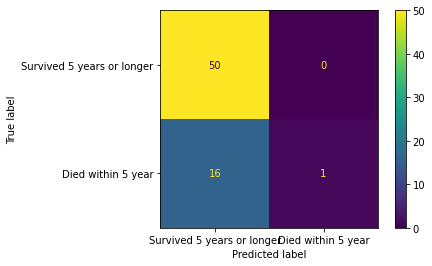

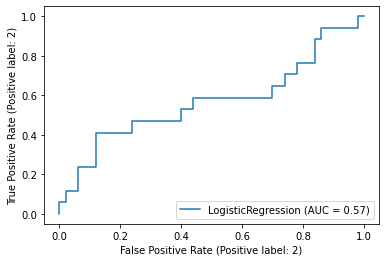

In [3]:
#Develop logistic regression

#Define the logistic regression model
clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(x_train, y_train)

#get the score for test data
clf.score(x_test, y_test)

#get the prediction score of test data
y_pred=clf.predict(x_test)

#label them with appropriate classification name
labels=["Survived 5 years or longer", "Died within 5 year"]

#get the confusion matrix
cm=confusion_matrix(y_test, y_pred, labels=clf.classes_)

#display the confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

#display the plot
disp.plot()

#print classification report
print(classification_report(y_test, y_pred, labels=clf.classes_))

#plot roc curve
plot_roc_curve(clf, x_test, y_test)
plt.show()

### Random Forest

              precision    recall  f1-score   support

           1       0.76      0.94      0.84        50
           2       0.40      0.12      0.18        17

    accuracy                           0.73        67
   macro avg       0.58      0.53      0.51        67
weighted avg       0.67      0.73      0.67        67



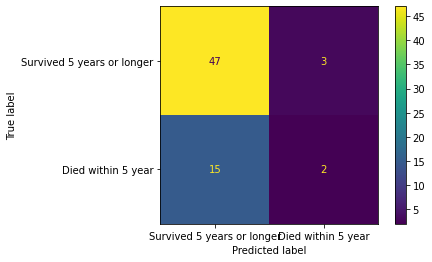

In [4]:
#Develop random forest algorithm

rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = "sqrt", random_state = 0).fit(x_train, y_train)

#make predictions
rf_pred = rf.predict(x_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()

print(classification_report(y_test, rf_pred, labels = clf.classes_))

### Support Vector Machine

              precision    recall  f1-score   support

           1       0.75      1.00      0.85        50
           2       0.00      0.00      0.00        17

    accuracy                           0.75        67
   macro avg       0.37      0.50      0.43        67
weighted avg       0.56      0.75      0.64        67



C:\Users\saroj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


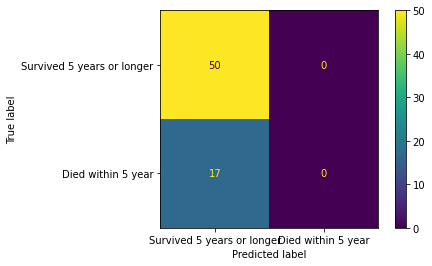

In [5]:
#Develop Support Vector Machine
svm = SVC(kernel ='linear', gamma = 'auto', C=2).fit(x_train, y_train)

svm_pred = svm.predict(x_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

### Neural Network

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        50
           2       1.00      0.12      0.21        17

    accuracy                           0.78        67
   macro avg       0.88      0.56      0.54        67
weighted avg       0.83      0.78      0.70        67



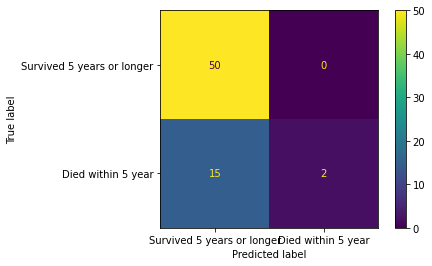

In [6]:
#develop Newural Network
nn = MLPClassifier(solver = "lbfgs", alpha=1e-5, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.001).fit(x_train, y_train)

nn_pred = nn.predict(x_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))


### 10-  Fold Cross Validation

In [7]:
#10-Fold Cross Validation for Logistic Regression

#split the iteration into 10 fold
kf = KFold(n_splits = 10)

#assign a variable to get the linear regression score
lrscores=[]

#assume the iteration starts with 1
iteration = 1

#use for loop to get the score untill the 10 interations
for train_indices, test_indices in kf.split(x_train):
    clf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    
    iteration+=1
        
    a= clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])
    
    lrscores.append(a)
    
print(lrscores)

[0.75, 0.7, 0.85, 0.8, 0.8, 0.85, 0.8, 0.85, 0.8421052631578947, 0.6842105263157895]


In [8]:
#10-Fold Cross Validation for Random Forest

rfscores=[]

iteration = 1

for train_indices, test_indices in kf.split(x_train):
    rf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    iteration+=1
    b= rf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])
    
    rfscores.append(b)
print(rfscores)

[0.75, 0.7, 0.85, 0.8, 0.8, 0.8, 0.85, 0.7, 0.8947368421052632, 0.6842105263157895]


In [9]:
#10-Fold Cross Validation for Support Vector Machine
svmscores=[]

iteration = 1

for train_indices, test_indices in kf.split(x_train):
    
    svm.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    
    iteration+=1
    
    c= svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices])
    
    svmscores.append(c)
    
print(svmscores)
    

In [10]:
#10-Fold Cross Validation for Neural Network
nnscores=[]
iteration = 1
for train_indices, test_indices in kf.split(x_train):
    nn.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    
    iteration+=1
    
    d= nn.score(x_train.iloc[test_indices], y_train.iloc[test_indices])
    
    nnscores.append(d)
    
print(nnscores)

C:\Users\saroj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[0.7, 0.75, 0.85, 0.8, 0.85, 0.7, 0.8, 0.85, 0.7894736842105263, 0.7368421052631579]


C:\Users\saroj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Gridsearch CV

In [20]:
# #GridSearchCV for logistic Regression

#give all the possible parameters
parameters = {'solver':('lbfgs', 'liblinear', 'sag', 'saga'),
              'C': [100, 10, 1.0, 0.1, 0.01]}

#assign the model and parameters
clf_grid = GridSearchCV(clf, parameters)

#apply gridsearchCV on training data
clf_grid.fit(x_train, y_train)

#get the best possible parameters for logistic regression
clf_grid.best_params_

C:\Users\saroj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\saroj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 100, 'solver': 'saga'}

In [ ]:
#GridSearchCV for Support Vector Machine
parameters = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C': [100, 10, 1.0, 0.1, 0.001], 'gamma': [100, 10, 1.0, 0.1]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(x_train, y_train)
svm_grid.best_params_

In [13]:
#GridSearchCV for Random Forest
parameters = {'max_features': ( 'sqrt', 'log2'), 'n_estimators': [100, 10, 1000],'max_depth': [5, 10, 15]}
rf_grid = GridSearchCV(rf, parameters)
rf_grid.fit(x_train, y_train)
rf_grid.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 10}

In [15]:
#GridSearchCV for Neural Network
parameters = {'solver':('sgd', 'lbfgs', 'adam'), 'learning_rate': ('constant', 'invscaling', 'adaptive')}

nn_grid = GridSearchCV(nn, parameters)
nn_grid.fit(x_train, y_train)
nn_grid.best_params_

C:\Users\saroj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\saroj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

{'learning_rate': 'constant', 'solver': 'adam'}

### Q3 Answer:
    

In [ ]:
#calculate the average of train data and test data to see if the algorithms are overfitting
print("The Average train score for all corresponding  modules are: ")
print(np.mean(lrscores))
print(np.mean(rfscores))
print(np.mean(svmscores))
print(np.mean(nnscores))

lravg = np.mean(lrscores)
rfavg = np.mean(rfscores)
svmavg = np.mean(svmscores)
nnavg = np.mean(nnscores)

#performance on the test data
lrpred = cross_val_predict(clf, x_test, y_test)
rfpred = cross_val_predict(rf, x_test, y_test)
svmpred = cross_val_predict(svm, x_test, y_test)
nnpred = cross_val_predict(nn, x_test, y_test)

#10 fold CV on test data
lrscores_test = cross_val_score(clf, x_test, y_test, cv=10)
rfscores_test = cross_val_score(rf, x_test, y_test, cv=10)
svmscores_test = cross_val_score(svm, x_test, y_test, cv=10)
nnscores_test = cross_val_score(nn, x_test, y_test, cv=10)


#print the average test score
print("The Average score of Test Data for all corresponding  modules are: ")
print(np.mean(lrscores_test))
print(np.mean(rfscores_test))
print(np.mean(svmscores_test))
print(np.mean(nnscores_test))

Interpretion: Since the average train score and average test is very similar, the algorithm is not overfitting or underfitting.

### Q4 Answer:

In [ ]:
#develop a newural network model
neural_network = MLPClassifier(solver = "lbfgs", alpha=1e-5, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.001).fit(x_train, y_train)

#develop a function to implement machine learning
def machine_learning(data, algorithm):
    
    #get the score of the corresponding algorithm
    algorithm.score(x_test, y_test)
    
    #get the prediction score
    y_pred=algorithm.predict(x_test)
    
    #label the confusion matrix with their appropriate classification name
    labels=["Survived 5 years or longer", "Died within 5 year"]
    
    #get the confusion matrix
    cm=confusion_matrix(y_test, y_pred, labels=clf.classes_)
    
    #display the confusion matrix with the label
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    
    #assign a variable to display the plot
    performancemetrics = disp.plot()
    
    #print classification report
    print(classification_report(y_test, y_pred, labels=clf.classes_))
    
    #print roc curve
    plot_roc_curve(algorithm, x_test, y_test)
    
    #return performance metrics
    return performancemetrics

#call the function
machine_learning(data, neural_network)